In [ ]:
################################################################
## GPU Should be enabled in colab
## This notebook is reproducing results from https://github.com/kanekomasahiro/gp_debias
## You should upload debiasing.ipynb into https://colab.research.google.com/ to run it
################################################################
!git clone https://github.com/pavelbystrov1/debiasing_evaluation
!git clone https://github.com/kanekomasahiro/gp_debias
!cd ./gp_debias; mkdir d; cd d; git clone https://github.com/uclanlp/gn_glove.git
!paste ./gp_debias/d/gn_glove/wordlist/female_word_file.txt ./gp_debias/d/gn_glove/wordlist/male_word_file.txt > ./gp_debias/wordlist/gender_pair.tsv 
!cp -r ./gp_debias/d/gn_glove/SemBias ./gp_debias/
!ls ./gp_debias
##############################################################################
# Glove embedding trained on wikidump dataset can be downloaded using code below or manually - https://drive.google.com/open?id=1jrbQmpB5ZNH4w54yujeAvNFAfVEG0SuE
# GN-Glove embedding trained on wikidump dataset can be downloaded using code below or manually - https://drive.google.com/file/d/1v82WF43w-lE-vpZd0JC1K8WYZQkTy_ii/
##############################################################################
!gdown --id '1jrbQmpB5ZNH4w54yujeAvNFAfVEG0SuE'
!gdown --id '1v82WF43w-lE-vpZd0JC1K8WYZQkTy_ii'
##########################################
# unzip GloVe embedding
##########################################
!cd gp_debias; mkdir -p src/glove_model
!cp GloVe.zip ./gp_debias/src/glove_model/
!cd gp_debias/src/glove_model; unzip GloVe.zip
!cd gp_debias/src/glove_model; sed -i "1s/^/322636 300\n/" vectors.txt
!cd gp_debias/; mkdir embeddings
!mv gp_debias/src/glove_model/vectors.txt gp_debias/embeddings/glove.txt
!cd gp_debias; mkdir -p src/debiased_glove
!ls gp_debias/embeddings/

fatal: destination path 'debiasing_evaluation' already exists and is not an empty directory.
fatal: destination path 'gp_debias' already exists and is not an empty directory.
mkdir: cannot create directory ‘d’: File exists
fatal: destination path 'gn_glove' already exists and is not an empty directory.
d	     embeddings		      hyperparams  README.md  SemBias  wordlist
download.sh  eval_word_embeddings.py  LICENSE	   run.sh     src
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1jrbQmpB5ZNH4w54yujeAvNFAfVEG0SuE
To: /content/GloVe.zip
100% 368M/368M [00:01<00:00, 187MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file 

In [ ]:
###########################################
# create classifiers for glove
# save gp_glove embedding
###########################################
!cd gp_debias; python src/train.py glove
!cd gp_debias; python src/eval.py glove
!ls gp_debias/src/debiased_glove
#############################################################
# create folder for evaluation of generated word embeddings
# and copy glove.txt and gp_glove.txt there
#############################################################
!cd ./debiasing_evaluation; mkdir glove
!mv gp_debias/embeddings/glove.txt debiasing_evaluation/glove/glove.txt
!mv gp_debias/src/debiased_glove/gender_debiased.txt debiasing_evaluation/glove/gp_glove.txt
!mv gp_debias/src/debiased_glove/gender_debiased.bin debiasing_evaluation/glove/gp_glove.bin
#######################################
#      prepare data for GN-Glove
#######################################
!cd gp_debias; 
!cp /content/GN-GloVe-L1-0.8-0.8.txt.zip /content/gp_debias/src/glove_model/
!cd gp_debias/src/glove_model; unzip "GN-GloVe-L1-0.8-0.8.txt.zip"
!cd gp_debias/src/glove_model; sed -i "1s/^/322636 300\n/" vectors300.txt
!cp gp_debias/src/glove_model/vectors300.txt gp_debias/src/glove_model/glove.txt
!mv gp_debias/src/glove_model/glove.txt gp_debias/embeddings/glove.txt
!ls gp_debias/src/glove_model

Loading word embedding
Loading data
Pre-training autoencoder
/content/gp_debias/src/pre_train_autoencoder.py:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  eval_inputs = torch.split(torch.FloatTensor(emb_list[:hp.pta_dev_num]), hp.pta_batch_size)
src/train.py:426: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  train_female_embs = [encoder(torch.FloatTensor(emb[word[0]]).cuda()).data if hp.gpu >= 0 else encod

In [ ]:
###########################################
# create classifiers for GN-glove and save gp_gn_glove embedding
###########################################
!cd gp_debias; python src/train.py glove
!cd gp_debias; python src/eval.py glove
!ls gp_debias/src/debiased_glove
#############################################################
# copy GN-glove and gp_gn_glove there
#############################################################
!mv gp_debias/embeddings/glove.txt debiasing_evaluation/glove/gn_glove.txt
!mv gp_debias/src/debiased_glove/gender_debiased.txt debiasing_evaluation/glove/gp_gn_glove.txt
!mv gp_debias/src/debiased_glove/gender_debiased.bin debiasing_evaluation/glove/gp_gn_glove.bin
!ls debiasing_evaluation/glove/


Loading word embedding
Loading data
Pre-training autoencoder
/content/gp_debias/src/pre_train_autoencoder.py:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  eval_inputs = torch.split(torch.FloatTensor(emb_list[:hp.pta_dev_num]), hp.pta_batch_size)
src/train.py:426: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  train_female_embs = [encoder(torch.FloatTensor(emb[word[0]]).cuda()).data if hp.gpu >= 0 else encod

In [ ]:
###############################################################
# Load SimLex, datasets from Semantic-measure-assessment study and Google anthologies
# Copy wordlists, SemBias and other test datasets to do evaluation later
###############################################################
!wget https://fh295.github.io/SimLex-999.zip
!git clone https://github.com/MohamedAliHadjTaieb/Semantic-measure-assessment-review-study
!wget http://download.tensorflow.org/data/questions-words.txt
!unzip SimLex-999.zip
!mv questions-words.txt debiasing_evaluation/glove/google_anthology_ds.txt
!mv SimLex-999/SimLex-999.txt debiasing_evaluation/glove/SimLex-999.txt
!cp "Semantic-measure-assessment-review-study/DataSets/English/Semantic Relatedness/MT771.csv" debiasing_evaluation/glove/MTurk.csv
!cp "Semantic-measure-assessment-review-study/DataSets/English/Semantic Relatedness/RW2034.csv" debiasing_evaluation/glove/
!cp "Semantic-measure-assessment-review-study/DataSets/English/Semantic Relatedness/WordSim353.csv" debiasing_evaluation/glove/
!cp "Semantic-measure-assessment-review-study/DataSets/English/Semantic Similarity/RG65.csv" debiasing_evaluation/glove/
!cp "Semantic-measure-assessment-review-study/DataSets/English/Semantic Similarity/MEN3000.csv" debiasing_evaluation/glove/
!cp -r ./gp_debias/d/gn_glove/SemBias debiasing_evaluation/glove/
!cp -r ./gp_debias/wordlist debiasing_evaluation/glove/
############################################
#            Preparation DONE
############################################

--2022-04-29 14:33:23--  https://fh295.github.io/SimLex-999.zip
Resolving fh295.github.io (fh295.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fh295.github.io (fh295.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16805 (16K) [application/zip]
Saving to: ‘SimLex-999.zip’

SimLex-999.zip      100%[===================>]  16.41K  --.-KB/s    in 0.002s  

2022-04-29 14:33:24 (9.95 MB/s) - ‘SimLex-999.zip’ saved [16805/16805]

Cloning into 'Semantic-measure-assessment-review-study'...
remote: Enumerating objects: 1365, done.
remote: Total 1365 (delta 0), reused 0 (delta 0), pack-reused 1365
Receiving objects: 100% (1365/1365), 690.99 KiB | 1.52 MiB/s, done.
Resolving deltas: 100% (618/618), done.
--2022-04-29 14:33:25--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to download.te

In [ ]:
##############################################
# for Google colab path starts with /content/ if you will run this ipynb-file localy please remove "/content" from directories below
##############################################
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


from numpy import dot
from numpy.linalg import norm
from gensim.models import KeyedVectors
import pathlib
from pathlib import Path

import numpy as np
from scipy import stats
from functools import reduce
import pandas as pd
import seaborn as sns

SEM_BIAS = '/content/debiasing_evaluation/glove/SemBias/SemBias'
GP_GN = '/content/debiasing_evaluation/glove/gp_gn_glove.txt'
GN_GLOVE = '/content/debiasing_evaluation/glove/gn_glove.txt'
GLOVE = '/content/debiasing_evaluation/glove/glove.txt'
GOOGLE_ANT = '/content/debiasing_evaluation/glove/google_anthology_ds.txt'
RG65 = '/content/debiasing_evaluation/glove/RG65.csv'
WS = '/content/debiasing_evaluation/glove/WordSim353.csv'
MTURK = '/content/debiasing_evaluation/glove/MTurk.csv'
RW = '/content/debiasing_evaluation/glove/RW2034.csv'
MEN = '/content/debiasing_evaluation/glove/MEN3000.csv'
SIMLEX = '/content/debiasing_evaluation/glove/SimLex-999.txt'
SEM_EVAL = '/content/debiasing_evaluation/glove/SemEval'
GP_GLOVE = '/content/debiasing_evaluation/glove/gp_glove.txt'
STEREOTYPE = '/content/debiasing_evaluation/glove/wordlist/stereotype_list.tsv'
NOGENDER = '/content/debiasing_evaluation/glove/wordlist/no_gender_list.tsv'
GENDER = '/content/debiasing_evaluation/glove/wordlist/gender_pair.tsv'

In [ ]:
def load_words_pair(words, embedding, gender_v, w1, w2, categ):
    """put cosine similarity and category for pair of words into word dictionary"""
    v1 = embedding[w1]
    v2 = embedding[w2]
    score1 = dot(gender_v, v1)/(norm(gender_v)*norm(v1))
    score2 = dot(gender_v, v2)/(norm(gender_v)*norm(v2))
    words[w1] = (score1, categ)
    words[w2] = (score2, categ)
    return


def evaluate_embeding_accuracies(model, emb_name, file=SEM_BIAS):
    """
       compute embeding prediction accuracies for gender relational analogies
       on SemBias dataset and SemBias-subset
       #######################################################################
       This code is taken from supplimentary materials to the following paper for evaluation:
       Masahiro Kaneko, Danushka Bollegala "Gender-preserving Debiasing for Pre-trained Word Embeddings", 
       2019
       https://github.com/kanekomasahiro/gp_debias
       #######################################################################
    """
    definition_num = 0
    none_num = 0
    stereotype_num = 0
    total_num = 0
    sub_definition_num = 0
    sub_none_num = 0
    sub_stereotype_num = 0
    sub_size = 40
    words, uni_words = {}, []

    # updated code to close file
    with open(file) as bias_analogy_f:
        sub_start = -(sub_size - sum(1 for line in bias_analogy_f))
    # updated code to close file later
    bias_analogy_f = open(file)

    gender_v = model['he'] - model['she']
    for sub_idx, l in enumerate(bias_analogy_f):
        l = l.strip().split()
        max_score = -100
        for i, word_pair in enumerate(l):
            word_pair = word_pair.split(':')
            pre_v = model[word_pair[0]] - model[word_pair[1]]
            score = dot(gender_v, pre_v)/(norm(gender_v)*norm(pre_v))
            if score > max_score:
                max_idx = i
                max_score = score
            # updated code to return full vocabulary as uni_words
            if word_pair[0] not in uni_words:
                uni_words.append(word_pair[0])
            if word_pair[1] not in uni_words:
                uni_words.append(word_pair[1])
            # updated code to return similarities and type of words pair as dict words
            load_words_pair(words, model, gender_v, word_pair[0], word_pair[1], i)
        if max_idx == 0:
            definition_num += 1
            if sub_idx >= sub_start:
                sub_definition_num += 1
        elif max_idx == 1 or max_idx == 2:
            none_num += 1
            if sub_idx >= sub_start:
                sub_none_num += 1
        elif max_idx == 3:
            stereotype_num += 1
            if sub_idx >= sub_start:
                sub_stereotype_num += 1
        total_num += 1
    if definition_num == 0:
        print('definition: 0')
    else:
        print('definition: {}'.format(definition_num / total_num))
    if stereotype_num == 0:
        print('stereotype: 0')
    else:
        print('stereotype: {}'.format(stereotype_num / total_num))
    if none_num == 0:
        print('none: 0')
    else:
        print('none: {}'.format(none_num / total_num))
    if sub_definition_num == 0:
        print('sub definition: 0')
    else:
        print('sub definition: {:.5f}'.format(sub_definition_num / sub_size))
    if sub_stereotype_num == 0:
        print('sub stereotype: 0')
    else:
        print('substereotype: {:.5f}'.format(sub_stereotype_num / sub_size))
    if sub_none_num == 0:
        print('sub none: 0')
    else:
        print('sub none: {:.5f}'.format(sub_none_num / sub_size))
    # updated code to close file
    bias_analogy_f.close()
    # updated code to save results to text-file for table
    with open(f'{emb_name}_results.txt', 'w') as f:
        f.write(f'{definition_num / total_num}, {stereotype_num / total_num}, {none_num / total_num}, ' +
                f'{sub_definition_num / sub_size}, {sub_stereotype_num / sub_size}, {sub_none_num / sub_size}\n')
    return uni_words, words


def load_wordlist(fname):
    with open(fname, 'r') as f:
        lst = [w.replace('\n', '').strip() for w in f]
    return lst


def load_gender_pairs(fname):
    with open(fname, 'r') as f:
        replaced = [w.replace('\n', '') for w in f]
        lst = [w.split() for w in replaced if w.split()[0] not in ['sororal', 'barwoman', 'brideprice', 'airwomen'] ]
    return list(reduce(lambda x, y: x + y, lst))
    

In [ ]:
def similarity(gender_v, v):
    return dot(gender_v, v)/(norm(gender_v) * norm(v))


def print_neutral_stereotype_similarities(emb, uni, words):
    """print neutral, stereotype and gender words similarities mean and std"""
    gender_v = emb['he'] - emb['she']
    
    stereotype = load_gender_pairs(STEREOTYPE)
    neutral = load_wordlist(NOGENDER)
    gender =  [s for s in uni if words[s][1] in [1, 2]]
    
    neutral_sims = np.array([similarity(gender_v, emb[w]) for w in neutral])
    stereot_sims = np.array([similarity(gender_v, emb[w]) for w in stereotype])
    gender_sims = np.array([similarity(gender_v, emb[w]) for w in gender])
    templ1, templ2 = 'Mean, std for ', ' words similarities with gender_v are:'
    
    print(f'{templ1}neutral{templ2}{neutral_sims.mean()}{neutral_sims.std()}\n' +
          f'{templ1}stereotype{templ2}{stereot_sims.mean()} {stereot_sims.std()}\n' + 
          f'{templ1}gender{templ2}{gender_sims.mean()} {gender_sims.std()}')
    del neutral_sims, stereot_sims, gender_sims 
    return

    
def plot_graphs(emb, uni, words, embeddings_type):
    """ draw scatter plot of words similarities with gender vector gender_v VS word number """
    from sklearn.manifold import TSNE
    w = words
    gender_def = ['he', 'she', 'gentleman', 'lady', 'businesswoman', 'businessman',  'spokesman', 'spokeswoman', 
                  'congresswoman', 'congressman', 'waiter', 'waitress', 'policewoman', 'policeman']
    gender_v = emb['he'] - emb['she']

    st_lst = load_gender_pairs(STEREOTYPE)
    stereotype = sorted(st_lst)[:50]
    nt_lst = load_wordlist(NOGENDER)
    neutral = sorted(nt_lst)[:50]

    n_len = len(neutral)
    all_words = neutral + gender_def + stereotype
    
    y = np.array([similarity(gender_v, v) for v in [emb[s] for s in all_words]])
    X = np.array(list(range(len(all_words))))
    colors = [0.7 if i < n_len else 2.3 if i < n_len + len(gender_def) else 1.4 for i in range(len(all_words))]
    #plot 2D T-SNE grapth for word vectors
    tsne = TSNE(random_state=17)
    X_tsne = tsne.fit_transform([emb[w] for w in all_words])
    
    plt.figure(figsize=(12,10))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, vmin=0, vmax=3,
                edgecolor='none', s=60,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.title(f't-SNE projection for {embeddings_type} vectors for {len(all_words)} words');
    plt.show()
    # Gender related cosine similarities for embedding
    plt.figure(figsize=(12,10))
    plt.scatter(y, X, c=colors, vmin=0, vmax=3,
                edgecolor='none',  s=70,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.ylabel("number in word list")
    plt.xlabel("similarity")
    plt.savefig(f'{embeddings_type}_sim.jpg', bbox_inches='tight')
    plt.show()
    return


In [ ]:
def get_GENERIC_DS(fn, emb):
    """ load text dataset"""
    with open(fn, "r") as f:
        v = [line.lower().split() for line in f]
    return [similarity(emb[p[0]], emb[p[1]]) for p in v], [p[2] for p in v]


def get_RW(fn, emb, vocab):
    """ load RW dataset"""
    def get_score(p1, p2):
        return similarity(emb[p1], emb[p2]) if p1 in vocab and p2 in vocab else 0.
    
    
    with open(fn, "r") as f:
        v = [[line[:10].strip()] + list(line.lower().split()) for line in f]
    return [get_score(p[0], p[1].strip()) for p in v], [p[2].strip() for p in v]


def get_MEN(fn, emb):
    """ to load MEN dataset"""
    with open(fn, "r") as f:
        v = [line.lower().split() for line in f]
    return [similarity(emb[p[0].split('-')[0]], emb[p[1].split('-')[0]]) for p in v], [p[2] for p in v]


def get_WordSim(fn, emb):
    """ to load WORDSIM dataset"""
    with open(fn, "r") as f:
        v = [line.lower().split() for line in f if line[:6] != "Word 1"]
    return [similarity(emb[p[0]], emb[p[1]]) for p in v], [p[2] for p in v]


def get_SimLex(fn, emb):
    """ to load SIMLEX dataset"""
    with open(fn, "r") as f:
        v = [line.lower().split() for line in f if line[:5] != "word1"]
    return [similarity(emb[p[0]], emb[p[1]]) if p[0] != 'disorganize' else 0 for p in v], [p[3] for p in v]


def compute_correlation_bewteen_embedding_results_and_ratings(emb, vocab, emb_name):
    """
       compute cosine similrity for words pairs from RG65, WordSim Orig, WordSim Balanced, MTurk, RW,
       MEN and SimLex datasets. 
       Then compute correlation bewteen already calculated similarities and human ratings
    """
    similarity1, scores = get_GENERIC_DS(RG65, emb)
    similarity3, scores3 = get_WordSim(WS, emb)
    similarity4, scores4 = get_GENERIC_DS(MTURK, emb)
    similarity5, scores5 = get_RW(RW, emb, vocab)
    similarity6, scores6 = get_GENERIC_DS(MEN, emb)
    similarity7, scores7 = get_SimLex(SIMLEX, emb)
    # compute correlation bewteen calculated similarities and human ratings
    sr = stats.spearmanr(np.array(similarity1), np.array(scores))
    print(f'Spearman rank correlation on RG65: {sr.correlation}')
    sr_ws2 = stats.spearmanr(np.array(similarity3), np.array(scores3))
    print(f'Spearman rank correlation on WS: {sr_ws2.correlation}')
    sr_turk = stats.spearmanr(np.array(similarity4), np.array(scores4))
    print(f'Spearman rank correlation on TURK: {sr_turk.correlation}')
    sr_rw = stats.spearmanr(np.array(similarity5), np.array(scores5))
    print(f'Spearman rank correlation on RW: {sr_rw.correlation}')
    sr_men = stats.spearmanr(np.array(similarity6), np.array(scores6))
    print(f'Spearman rank correlation on MEN: {sr_men.correlation}')
    sr_simlex = stats.spearmanr(np.array(similarity7), np.array(scores7))
    print(f'Spearman rank correlation on SimLex: {sr_simlex.correlation}')
    # save results to a file
    with open(f'{emb_name}_sp_correlations.txt' ,'w') as f:
        f.write(f'{sr.correlation}, {sr_ws2.correlation}, {sr_turk.correlation}, {sr_rw.correlation}, \
        {sr_men.correlation}, {sr_simlex.correlation}\n')
    return


def get_vocabulary(fname):
    """ load vocabulary """
    with open(fname, "r") as f:
        vocab = [line.lower().split()[0] for line in f]
    # skip the first line which contains word count and number of components in embedding
    return vocab[1:]

# uni, w = evaluate_embeding_accuracies(emb_glove, emb_type)

def calculate_results(path, emb_type):
    """
        Calculating embeding accuracies, spearman correlations_bewteen word pairs similarities and ratings
        and drawing Graph with cosine similarities between gender vector and representations 
        for stereotypes, gender-definitional and neutral words.
    """
    # load Embedding and vocabulary
    emb_gn = KeyedVectors.load_word2vec_format(path, binary=False)
    vocab = get_vocabulary(path)
    
    print(f'Evaluating bias using SemEval dataset for {emb_type} representation')
    uni, words_dict = evaluate_embeding_accuracies(emb_gn, emb_type)
    compute_correlation_bewteen_embedding_results_and_ratings(emb_gn, vocab, emb_type)
    
    print_neutral_stereotype_similarities(emb_gn, uni, words_dict)
    print(f'Draw Scatter Plots with gender related cosine similarities for {emb_type}')
    plot_graphs(emb_gn, uni, words_dict, emb_type)

    # cleaning up memory
    del emb_gn, vocab
    return


Evaluating bias using SemEval dataset for GloVe representation
definition: 0.8022727272727272
stereotype: 0.10909090909090909
none: 0.08863636363636364
sub definition: 0.57500
substereotype: 0.20000
sub none: 0.22500
Spearman rank correlation on RG65: 0.746880260363494
Spearman rank correlation on WS: 0.599652147475783
Spearman rank correlation on TURK: 0.6489883631126866
Spearman rank correlation on RW: 0.7447258955231285
Spearman rank correlation on MEN: 0.24401717123636338
Spearman rank correlation on SimLex: 0.3485738190977309
Mean, std for neutral words similarities with gender_v are:-0.00025087705580517650.058663226664066315
Mean, std for stereotype words similarities with gender_v are:-0.026481281965970993 0.10634756088256836
Mean, std for gender words similarities with gender_v are:-0.022217784076929092 0.07693222165107727
Draw Scatter Plots with gender related cosine similarities for GloVe


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


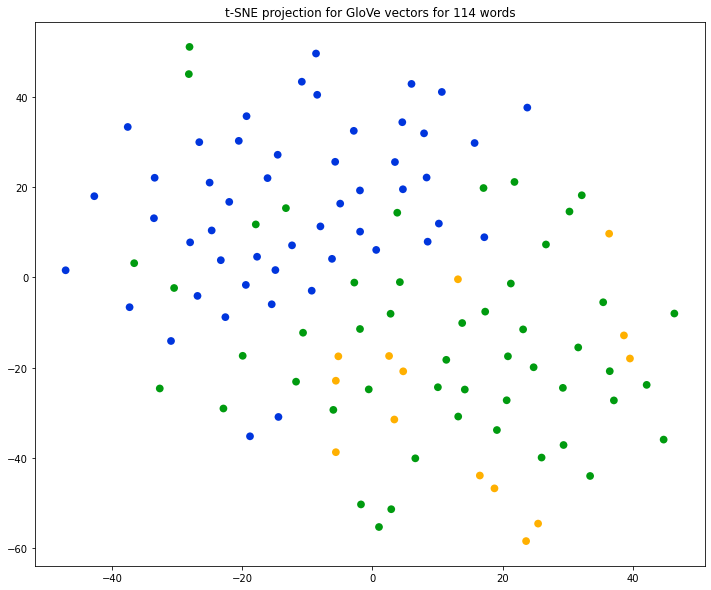

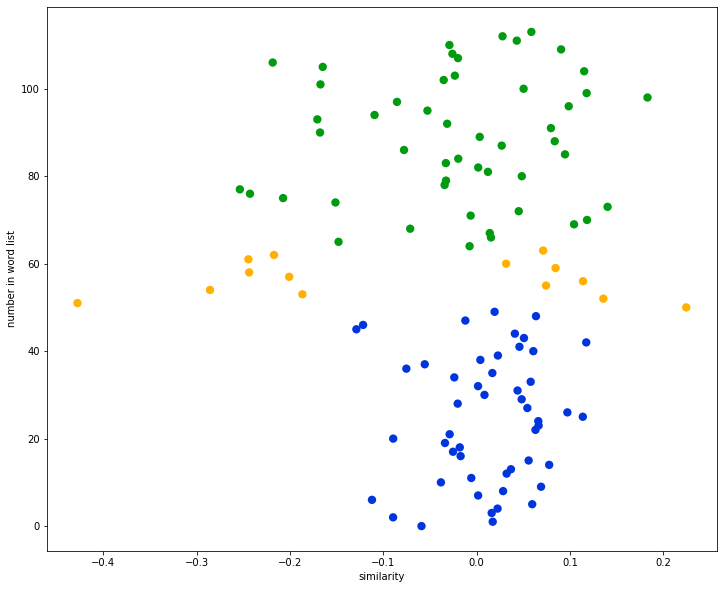

In [ ]:
calculate_results(GLOVE, 'GloVe')

Evaluating bias using SemEval dataset for GN-GloVe representation
definition: 0.9772727272727273
stereotype: 0.013636363636363636
none: 0.00909090909090909
sub definition: 0.75000
substereotype: 0.15000
sub none: 0.10000
Spearman rank correlation on RG65: 0.7323688194598698
Spearman rank correlation on WS: 0.6131594848679267
Spearman rank correlation on TURK: 0.6621889181411698
Spearman rank correlation on RW: 0.7441841994878774
Spearman rank correlation on MEN: 0.26638565854070917
Spearman rank correlation on SimLex: 0.37145936650008704
Mean, std for neutral words similarities with gender_v are:-0.0072272680699825290.03980892896652222
Mean, std for stereotype words similarities with gender_v are:-0.015346067026257515 0.09649530053138733
Mean, std for gender words similarities with gender_v are:-0.023990271613001823 0.04670483246445656
Draw Scatter Plots with gender related cosine similarities for GN-GloVe


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


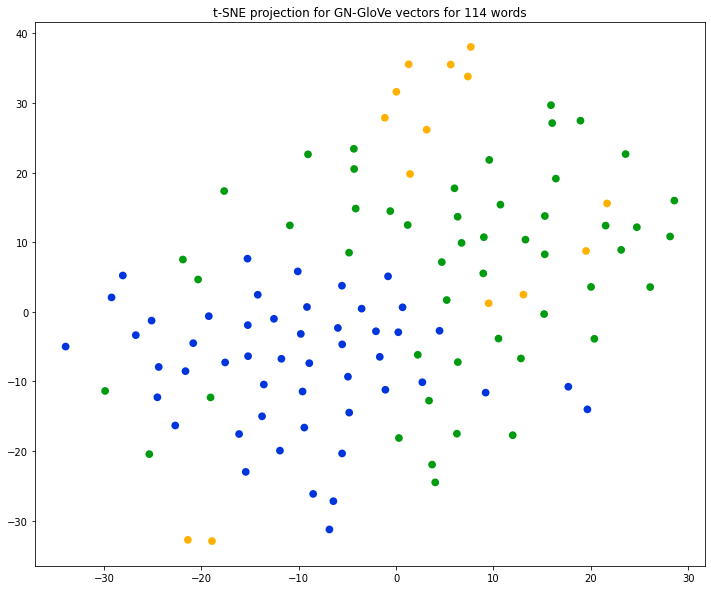

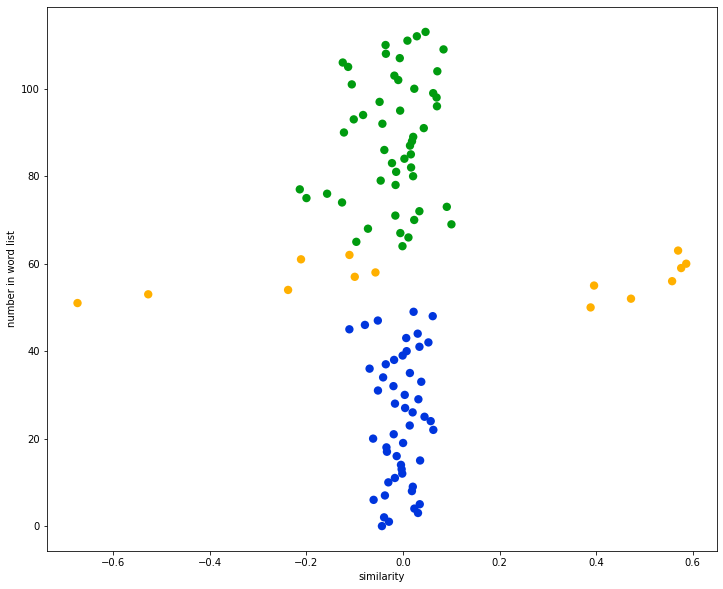

In [ ]:
calculate_results(GN_GLOVE, 'GN-GloVe')

Evaluating bias using SemEval dataset for GP-GloVe representation
definition: 0.8431818181818181
stereotype: 0.07954545454545454
none: 0.07727272727272727
sub definition: 0.65000
substereotype: 0.15000
sub none: 0.20000
Spearman rank correlation on RG65: 0.7502021564739622
Spearman rank correlation on WS: 0.5785696957918869
Spearman rank correlation on TURK: 0.6373003498618295
Spearman rank correlation on RW: 0.743537160841819
Spearman rank correlation on MEN: 0.22882671532157128
Spearman rank correlation on SimLex: 0.33993345459623925
Mean, std for neutral words similarities with gender_v are:-0.00508103985339403150.06689958274364471
Mean, std for stereotype words similarities with gender_v are:-0.016890542581677437 0.10152078419923782
Mean, std for gender words similarities with gender_v are:-0.008455565199255943 0.07897347211837769
Draw Scatter Plots with gender related cosine similarities for GP-GloVe


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


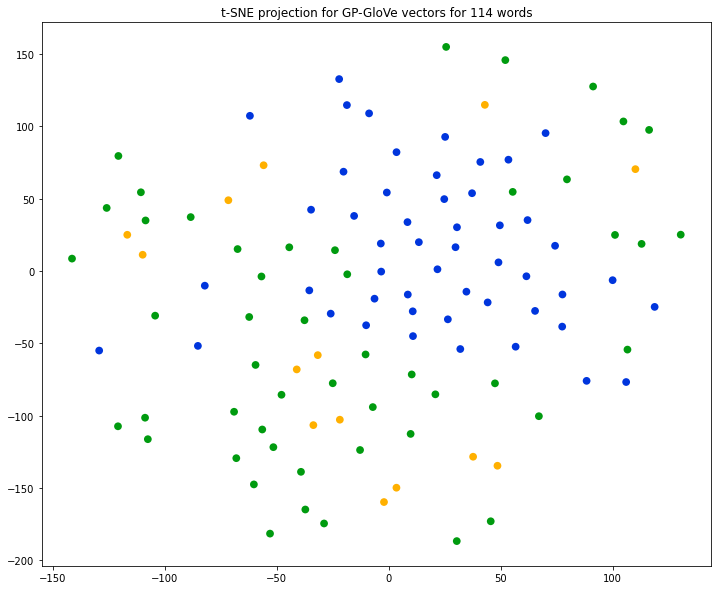

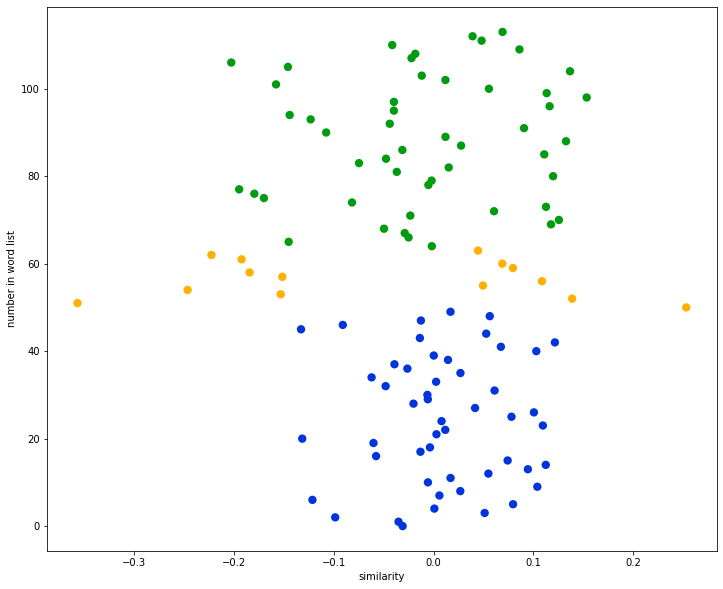

In [ ]:
calculate_results(GP_GLOVE, 'GP-GloVe')

Evaluating bias using SemEval dataset for GP-GN-GloVe representation
definition: 0.9818181818181818
stereotype: 0.011363636363636364
none: 0.006818181818181818
sub definition: 0.80000
substereotype: 0.12500
sub none: 0.07500
Spearman rank correlation on RG65: 0.6803549198354333
Spearman rank correlation on WS: 0.5607668881559732
Spearman rank correlation on TURK: 0.6513011963938938
Spearman rank correlation on RW: 0.7476579495399516
Spearman rank correlation on MEN: 0.24153303236320617
Spearman rank correlation on SimLex: 0.3535854470414376
Mean, std for neutral words similarities with gender_v are:-0.0191242173314094540.03845883160829544
Mean, std for stereotype words similarities with gender_v are:-0.012934627011418343 0.10322647541761398
Mean, std for gender words similarities with gender_v are:-0.018591679632663727 0.04352658987045288
Draw Scatter Plots with gender related cosine similarities for GP-GN-GloVe


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


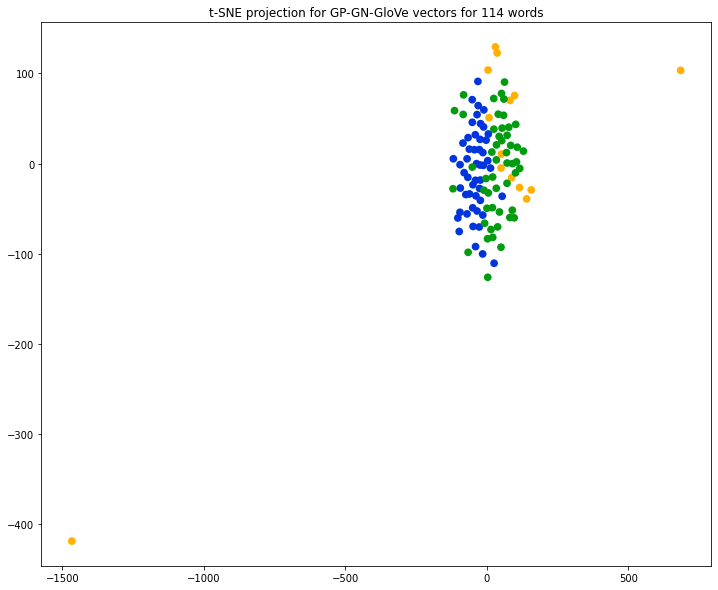

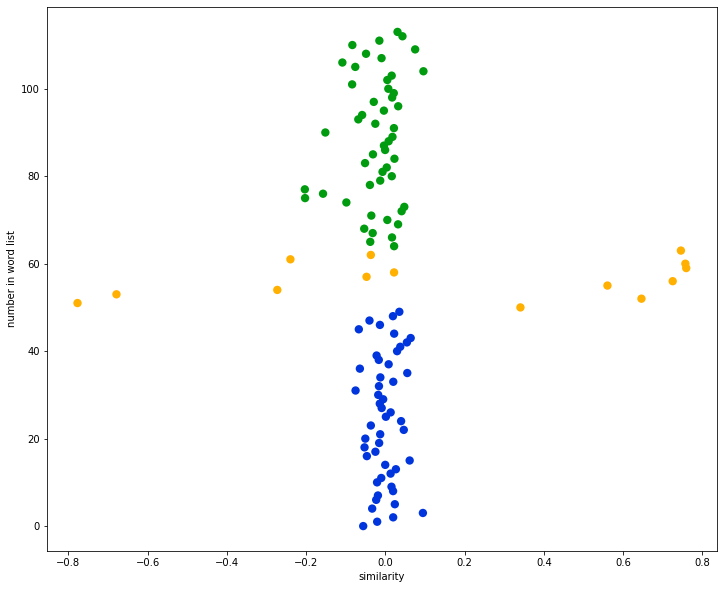

In [ ]:
calculate_results(GP_GN, 'GP-GN-GloVe')

In [ ]:
emb_gp_gn = KeyedVectors.load_word2vec_format(GP_GN, binary=False)

In [ ]:
def get_vocabulary(fn = GLOVE):
    with open(fn, "r") as f:
        vocab = [line.lower().split()[0] for line in f]
    return vocab[1:]


def get_analogies_ds(fn = GOOGLE_ANT):
    with open(fn, "r") as f:
        vocab = [line.lower().split() for line in f if line[0] != ':']
    return vocab


def get_semeval(path = SEM_EVAL):
    fnames = Path(path).rglob("*.txt")
    full_lst = []
    for n in fnames:
        pth = str(n)
        with open(pth, "r") as f:
            vocab = [line.replace('"', "").lower().split() for line in f if line[0] != '#']
        full_lst = full_lst + vocab
    res = [[p[0].split(':')] + [p[1].split(':')]+[p[2].split(':')] + [p[3].split(':')] for p in full_lst]
    return res


def cosmul_sim(w, a, b, c, to_do, eps = 0.01):
    """ 3COSMUL similarity """
    if to_do:
        print(cos(w, c), cos(w, b), cos(w, a))
    c1, c2, c3 = cos(w, c), cos(w, b), cos(w, a)
    if to_do:
        print(c1, c2, c3, (c1 * c2)/(c3 + eps))
    if c3 < 0:
        eps = -0.01
    return c1 * c2/(c3 + eps)

def cosine_sim(v, w, eps = 0.001, eps2 = 0.000001):
    """cosine similarity with numerical overflow protection or 3COSADD similarity"""
    return np.dot(w, v)/((np.linalg.norm(w) + eps2) * (np.linalg.norm(v) + eps))


def find_simi(lst, a, b, c, vocab, emb):
    """find argmax using 3COSADD method"""
    v1 = b - a + c
    amax = 0.
    result = ""
    for w2 in vocab:
        if w2 not in lst:
            sim = cosine_sim(emb[w2], v1)
            if sim > amax:
                result = w2
                amax = sim
    return result, amax



def cosmul_sim(w, a, b, c, to_do, eps = 0.01):
    """ 3COSMUL similarity """
    if to_do:
        print(cos(w, c), cos(w, b), cos(w, a))
    c1, c2, c3 = cos(w, c), cos(w, b), cos(w, a)
    if to_do:
        print(c1, c2, c3, (c1 * c2)/(c3 + eps))
    if c3 < 0:
        eps = -0.01
    return c1 * c2/(c3 + eps)

def cosine_sim(v, w, eps = 0.001, eps2 = 0.000001):
    """cosine similarity with numerical overflow protection or 3COSADD similarity"""
    return np.dot(w, v)/((np.linalg.norm(w) + eps2) * (np.linalg.norm(v) + eps))


def find_simi(lst, a, b, c, vocab, emb):
    """find argmax using 3COSADD method"""
    v1 = b - a + c
    amax = 0.
    result = ""
    for w2 in vocab:
        if w2 not in lst:
            sim = cosine_sim(emb[w2], v1)
            if sim > amax:
                result = w2
                amax = sim
    return result, amax


def calculate_acc_for_analogies(anthologies, emb_gn, vocab_gn):
    """ check accuracy of anthologies detection method using 3COSADD """
    corrects = 0
    total = 0
    a, b, c = "", "", ""
    emb1, emb2, emb3 = [0], [0], [0]
    for tup in anthologies:
        # saving vectors to speed up computation
        e1 = emb_gn[tup[0]] if a != tup[0] else emb1
        e2 = emb_gn[tup[1]] if b != tup[1] else emb2
        e3 = emb_gn[tup[2]] if c != tup[2] else emb3
        # trying to find similar word as argmax(3COSADD(e2-e1+e3, E(w))) for all words w in vocab except tup[:3]
        word, sim = find_simi(tup[:3], e1, e2, e3, vocab_gn, emb_gn)
        if word == tup[3]:
            corrects +=1
        total +=1
        emb1, emb2, emb3 = e1, e2, e3
        a, b, c = tup[0], tup[1], tup[2]
        if total % 200 == 0:
            print(total, *tup, word, sim, "actual:", tup[3], corrects/total)
    return corrects, total

analogies = get_analogies_ds()
vocab_gp_gn = get_vocabulary(fn = GP_GN)

In [ ]:
##################################################################
# It might take up to 48 hours to reproduce Google anthology tests !!
# you can run 2 next cells to verify results for 67 and 400 rows
#####################################################################
corrects, total = calculate_acc_for_analogies(analogies, emb_gp_gn, vocab_gp_gn)
print(f"Final score: {corrects/total} {corrects} {total}")

200 havana cuba islamabad pakistan pakistan 0.6373196279240257 actual: pakistan 0.96
400 paris france tokyo japan japan 0.6296925698790207 actual: japan 0.965
600 algiers algeria belgrade serbia serbia 0.708826016842488 actual: serbia 0.97
800 ashgabat turkmenistan cairo egypt egypt 0.595151121535518 actual: egypt 0.9675
1000 baku azerbaijan dublin ireland ireland 0.5962528090608104 actual: ireland 0.972
1200 beirut lebanon jakarta indonesia indonesia 0.6490071423248388 actual: indonesia 0.9725
1400 bishkek kyrgyzstan lima peru peru 0.5495437757975783 actual: peru 0.9707142857142858
1600 cairo egypt caracas venezuela venezuela 0.7132207770556203 actual: venezuela 0.969375
1800 copenhagen denmark funafuti tuvalu tuvalu 0.46459788067411767 actual: tuvalu 0.9688888888888889
2000 dublin ireland kampala uganda uganda 0.6038106880559133 actual: uganda 0.9705
2200 hanoi vietnam ljubljana slovenia slovenia 0.5541343648369021 actual: slovenia 0.9686363636363636
2400 jakarta indonesia mogadishu 

17200 thinking thought hitting hit hit 0.45592083463097943 actual: hit 0.6898837209302325
17400 bird birds machine machines machines 0.6135082378812335 actual: machines 0.6897701149425287
17600 cloud clouds donkey donkeys donkeys 0.3652489444464547 actual: donkeys 0.690625
17800 dollar dollars bird birds birds 0.4779135821040585 actual: birds 0.6906741573033708
18000 finger fingers mouse mice mickey 0.5046365748423155 actual: mice 0.6910555555555555
18200 machine machines elephant elephants elephants 0.5408956606179126 actual: elephants 0.6918681318681319
18400 onion onions child children children 0.5061565602422232 actual: children 0.6927717391304348
18600 road roads pig pigs pigs 0.45635719960984766 actual: pigs 0.693763440860215
18800 estimate estimates say says know 0.5408191099736609 actual: says 0.6931914893617022
19000 play plays shuffle shuffles composes 0.32336827837727344 actual: shuffles 0.6928421052631579
19200 shuffle shuffles speak speaks speaks 0.4804177180933778 actual:

In [ ]:
# Test for semantic analogies using previous results printed above
corrects, total = 13487, 19544

def calculate_acc_for_sem_analogies(analogies, emb_gn, vocab_gn):
    """ check accuracy of sem analogies
        initial accuracy was taken from row '8800 ...' of previous cell
    """
    previous_res = "8800 stepbrother stepsister policeman policewoman boyfriend 0.6182800965333808 actual: policewoman 0.7822727272727272"
    print(previous_res)
    total = 8800
    corrects = int(0.7822727272727272 * total)
    a, b, c = "", "", ""
    emb1, emb2, emb3 = [0], [0], [0]
    for tup in analogies[8800:8867]:
        # saving vectors to speed up computation
        e1 = emb_gn[tup[0]] if a != tup[0] else emb1
        e2 = emb_gn[tup[1]] if b != tup[1] else emb2
        e3 = emb_gn[tup[2]] if c != tup[2] else emb3
        # trying to find similar word as argmax(3COSADD(e2-e1+e3, E(w))) for all words w in vocab except tup[:3]
        word, sim = find_simi(tup[:3], e1, e2, e3, vocab_gn, emb_gn)
        if word == tup[3]:
            corrects +=1
        total +=1
        emb1, emb2, emb3 = e1, e2, e3
        a, b, c = tup[0], tup[1], tup[2]
        if total % 200 == 0:
            print(total, *tup, word, sim, "actual:", tup[3], corrects/total)
    print(total, *tup, word, sim, "actual:", tup[3], corrects/total)
    return corrects , total

print(f"GP-GN-GLOVE check")
sem_corrects, sem_total = calculate_acc_for_sem_analogies(analogies, emb_gp_gn, vocab_gp_gn)
print(f"GP-GN-GLOVE accuracy of sem analogies: {sem_corrects/sem_total} {sem_corrects} {sem_total}")
syn_acc = (corrects - sem_corrects) / (total - sem_total)
print(f"GP-GN-GLOVE accuracy of syn analogies: {syn_acc} correct answers: {corrects - sem_corrects}")
print(f"GP-GN-GLOVE overal accuracy for analogies: {corrects/ total} ")

GP-GN-GLOVE check
8800 stepbrother stepsister policeman policewoman boyfriend 0.6182800965333808 actual: policewoman 0.7822727272727272
8867 uncle aunt stepbrother stepsister her 0.7443622749504618 actual: stepsister 0.7824517875267847
GP-GN-GLOVE accuracy of sem analogies: 0.7824517875267847 6938 8867
GP-GN-GLOVE accuracy of syn analogies: 0.6133745434110706 correct answers: 6549
GP-GN-GLOVE overal accuracy for analogies: 0.690083913221449 


In [ ]:
# verification for 400 rows of Google analogies dataset
def calculate_sem_400(analogies, emb_gn, vocab_gn):
    """ check accuracy of sem analogies
        initial accuracy was taken from row '8800 ...' of previous cell
    """
    total = 0
    corrects = 0
    a, b, c = "", "", ""
    emb1, emb2, emb3 = [0], [0], [0]
    for tup in analogies[:400]:
        # saving vectors to speed up computation
        e1 = emb_gn[tup[0]] if a != tup[0] else emb1
        e2 = emb_gn[tup[1]] if b != tup[1] else emb2
        e3 = emb_gn[tup[2]] if c != tup[2] else emb3
        # trying to find similar word as argmax(3COSADD(e2-e1+e3, E(w))) for all words w in vocab except tup[:3]
        word, sim = find_simi(tup[:3], e1, e2, e3, vocab_gn, emb_gn)
        if word == tup[3]:
            corrects += 1
        total += 1
        emb1, emb2, emb3 = e1, e2, e3
        a, b, c = tup[0], tup[1], tup[2]
        if total % 200 == 0:
            print(total, *tup, word, sim, "actual:", tup[3], corrects/total)
    print(total, *tup, word, sim, "actual:", tup[3], corrects/total)
    return corrects , total

print(f"GP-GN-GLOVE check for the first 400 rows")
sem_corrects, sem_total = calculate_sem_400(analogies, emb_gp_gn, vocab_gp_gn)
print(f"GP-GN-GLOVE accuracy of sem analogies: {sem_corrects/sem_total} {sem_corrects} {sem_total}")

GP-GN-GLOVE check for the first 400 rows
200 havana cuba islamabad pakistan pakistan 0.651532150371734 actual: pakistan 0.96
400 paris france tokyo japan japan 0.660853177953463 actual: japan 0.96
600 algiers algeria belgrade serbia serbia 0.7237537016631082 actual: serbia 0.965
600 algiers algeria belgrade serbia serbia 0.7237537016631082 actual: serbia 0.965
GP-GN-GLOVE accuracy of sem analogies: 0.965 579 600


In [ ]:
!cd /content/; rm GN-GloVe-L1-0.8-0.8.txt.zip SimLex-999.zip GloVe.zip	